# The Challenge

Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinnking?"

In [280]:
import pandas as pd
import numpy as np

In [281]:
df = pd.read_csv("Data/train.csv")

In [282]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineer

### Title Feature

In [283]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']

df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))

In [284]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
df['Title']=df.apply(replace_titles, axis=1)

### Cabin Feature

In [285]:
def cabin_feature(df):
    df['Cabin'] = df['Cabin'].astype('str')
    cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
    df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
    df.Deck[df.Deck.isnull()] = 'O'
    
    return df

df = cabin_feature(df)
df.drop(df.loc[df.Deck=='T'].index, inplace = True)

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Family Size

In [286]:
#Creating new family_size column
df['Family_Size']=df['SibSp']+df['Parch'] + 1

## Putting Survived Column to the end

In [287]:
cols = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Deck',
       'Family_Size','Survived']

df = df.ix[:, cols]

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [288]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,Mr,O,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,Miss,O,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,Mr,O,1,0


## Preprocessing

In [289]:
dfx = df[['Pclass','Sex','Age','Fare','Embarked','Title','Deck', 'Family_Size', 'Survived']]
dfx.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Family_Size,Survived
0,3,male,22.0,7.2500,S,Mr,O,2,0
1,1,female,38.0,71.2833,C,Mrs,C,2,1
2,3,female,26.0,7.9250,S,Miss,O,1,1
3,1,female,35.0,53.1000,S,Mrs,C,2,1
4,3,male,35.0,8.0500,S,Mr,O,1,0


## Tratando idade com Null Values

In [290]:
def null_with_mean(df,column):
    mean = df[column].mean()
    dfx[column][dfx[column].isnull()] = mean
    
    return df

dfx = null_with_mean(dfx,'Age')
dfx = null_with_mean(dfx,'Fare')

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alysson\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Alysson

In [291]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 9 columns):
Pclass         890 non-null int64
Sex            890 non-null object
Age            890 non-null float64
Fare           890 non-null float64
Embarked       888 non-null object
Title          890 non-null object
Deck           890 non-null object
Family_Size    890 non-null int64
Survived       890 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 69.5+ KB


### Because we have only two lines without Embarked data, we can drop without problem

In [292]:
dfx.drop(dfx.loc[  
               (dfx.Embarked.isnull())].index, inplace = True)

C:\Users\Alysson\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [293]:
dfx.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Deck,Family_Size,Survived
0,3,male,22.0,7.2500,S,Mr,O,2,0
1,1,female,38.0,71.2833,C,Mrs,C,2,1
2,3,female,26.0,7.9250,S,Miss,O,1,1
3,1,female,35.0,53.1000,S,Mrs,C,2,1
4,3,male,35.0,8.0500,S,Mr,O,1,0


## Encoding

In [294]:
y = dfx.iloc[:, -1].values
dfx = dfx.iloc[:, :-1]

### Age

In [295]:
def dealing_age(dfx):
    dfx['AgeGroup'] = 'NaN'
    dfx['AgeGroup'][dfx.Age <= 5] = 'Baby'
    dfx['AgeGroup'][(dfx.Age > 5) & (dfx.Age <= 10)] = 'Children'
    dfx['AgeGroup'][(dfx.Age > 10) & (dfx.Age <= 17)] = 'Adolescent'
    dfx['AgeGroup'][(dfx.Age > 17) & (dfx.Age <= 25)] = 'Young'
    dfx['AgeGroup'][(dfx.Age > 25) & (dfx.Age <= 40)] = 'Adult'
    dfx['AgeGroup'][(dfx.Age > 40) & (dfx.Age <= 60)] = 'Senior'
    dfx['AgeGroup'][dfx.Age > 60] = 'Old'
    dfx= dfx.drop('Age',axis='columns')
    
    return dfx

dfx = dealing_age(dfx)

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Alysson\Ana

### Family-Size

In [296]:
dfx.Family_Size.unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [297]:
def dealing_with_family_size(dfx):
    dfx['family_size'] = 'NaN'
    dfx['family_size'][dfx.Family_Size == 1] = 'Alone'
    dfx['family_size'][dfx.Family_Size == 2] = 'With Someone'
    dfx['family_size'][(dfx.Family_Size > 2) & (dfx.Family_Size <= 3)] = 'Small Family'
    dfx['family_size'][(dfx.Family_Size > 3) & (dfx.Family_Size <= 5)] = 'MidSize Family'
    dfx['family_size'][(dfx.Family_Size > 5)] = 'big family'
    dfx= dfx.drop('Family_Size',axis='columns')
    
    return dfx

dfx = dealing_with_family_size(dfx)

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Alysson\Ana

### Pclass

In [298]:
def dealing_with_Pclass(dfx):
    data = pd.get_dummies(dfx.Pclass,prefix_sep="_", columns=[['a','b','c']])
    data.columns = ['Pclass_1', 'Pclass_2', 'Pclass_3']
    dfx= dfx.drop('Pclass',axis='columns')
    dfx['Pclass_1'] = data['Pclass_1'].to_list()
    dfx['Pclass_2'] = data['Pclass_2'].to_list()
    dfx['Pclass_3'] = data['Pclass_3'].to_list()
    
    return dfx

dfx = dealing_with_Pclass(dfx)

In [299]:
dfx = pd.get_dummies(dfx,drop_first=True)
dfx.columns

Index(['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_O', 'AgeGroup_Adult',
       'AgeGroup_Baby', 'AgeGroup_Children', 'AgeGroup_Old', 'AgeGroup_Senior',
       'AgeGroup_Young', 'family_size_MidSize Family',
       'family_size_Small Family', 'family_size_With Someone',
       'family_size_big family'],
      dtype='object')

In [300]:
X = dfx.iloc[:, :].values

## Split features and class

In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Models and Results

In [302]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    ('SVC',SVC(probability=True,gamma='auto')),
    ('Linear SVC', LinearSVC()),
    ('logistic', LogisticRegression(random_state=0, solver='newton-cg', multi_class='auto')),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('MultinomialNB', MultinomialNB()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=180, min_samples_leaf=3,max_features=0.5,n_jobs=-1)),
    ('MLPClassifier', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1))
]

results = {}
results_k_fold = {}

for name, model in classifiers:
    if name == 'SVC':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['SVC'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['SVC'] = np.mean(scores)
        
    elif name == 'Linear SVC':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['Linear SVC'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['Linear SVC'] = np.mean(scores)
        
    elif name == 'logistic':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['logistic'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['logistic'] = np.mean(scores)
        
    elif name == 'GaussianNB':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['GaussianNB'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['GaussianNB'] = np.mean(scores)
        
    elif name == 'BernoulliNB':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['BernoulliNB'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['BernoulliNB'] = np.mean(scores)
        
    elif name == 'MultinomialNB':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['MultinomialNB'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['MultinomialNB'] = np.mean(scores)
        
    elif name == 'DecisionTree':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['DecisionTree'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['DecisionTree'] = np.mean(scores)
        
    elif name == 'RandomForestClassifier':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['RandomForestClassifier'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['RandomForestClassifier'] = np.mean(scores)
    
    elif name == 'MLPClassifier':
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r = accuracy_score(y_test, y_pred)
        results['MLPClassifier'] = r
        scores = cross_val_score(model, X_train,y_train, cv=5)
        results_k_fold['MLPClassifier'] = np.mean(scores)

C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Alysson\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [303]:
results

{'SVC': 0.8146067415730337,
 'Linear SVC': 0.7752808988764045,
 'logistic': 0.8314606741573034,
 'GaussianNB': 0.797752808988764,
 'BernoulliNB': 0.797752808988764,
 'MultinomialNB': 0.6910112359550562,
 'DecisionTree': 0.7752808988764045,
 'RandomForestClassifier': 0.848314606741573,
 'MLPClassifier': 0.6292134831460674}

In [304]:
results_k_fold

{'SVC': 0.7549349561636046,
 'Linear SVC': 0.7830851098756403,
 'logistic': 0.8183762895779678,
 'GaussianNB': 0.7803274440073961,
 'BernoulliNB': 0.787379965953535,
 'MultinomialNB': 0.739402042368779,
 'DecisionTree': 0.776061716726985,
 'RandomForestClassifier': 0.8169277431189329,
 'MLPClassifier': 0.8112944991278823}

**We can see that in this case the DecisionTree model was best, so lest execute it again for use later on our test set**

In [311]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=180, min_samples_leaf=3,max_features=0.5,n_jobs=-1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.848314606741573

In [310]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7808988764044944

**One Advantage of this code is that we can see wich feature was more important**

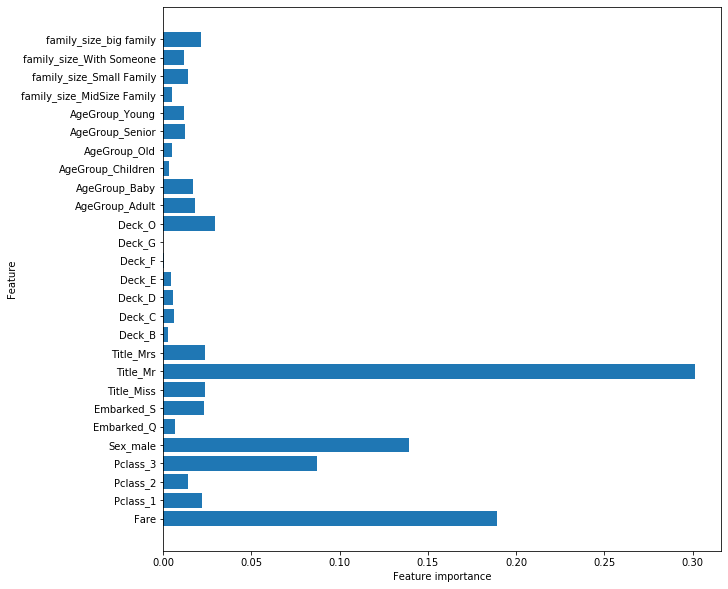

In [312]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = list(dfx.columns)
    fig= plt.figure(figsize=(10,10))
    fig.set_facecolor('xkcd:white')
    plt.barh(range(len(n_features)), model.feature_importances_, align='center')
    plt.yticks(np.arange(len(n_features)), list(dfx.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importances(classifier)

## Now we read the test data, transforme and predict:

In [317]:
df = pd.read_csv("Data/test.csv")

In [320]:
df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
df['Title']=df.apply(replace_titles, axis=1)
df = cabin_feature(df)
df['Family_Size']=df['SibSp']+df['Parch'] + 1
dfx = df[['Pclass','Sex','Age','Fare','Embarked','Title','Deck', 'Family_Size']]
dfx = null_with_mean(dfx,'Age')
dfx = null_with_mean(dfx,'Fare')
dfx = dfx.iloc[:, :]
dfx = dealing_age(dfx)
dfx = dealing_with_family_size(dfx)
dfx = dealing_with_Pclass(dfx)
dfx = pd.get_dummies(dfx,drop_first=True)
X = dfx.iloc[:, :].values

C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alysson\Anaconda3\lib\site-packages\ipykernel_la

In [321]:
dfx.columns

Index(['Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_O', 'AgeGroup_Adult',
       'AgeGroup_Baby', 'AgeGroup_Children', 'AgeGroup_Old', 'AgeGroup_Senior',
       'AgeGroup_Young', 'family_size_MidSize Family',
       'family_size_Small Family', 'family_size_With Someone',
       'family_size_big family'],
      dtype='object')

**We already trained the classifier, so we just predict**

In [322]:
y_pred = classifier.predict(X)

**The result for the predict above is already o order, so we just create a column Survived and pass y_pred**

In [323]:
df["Survived"] = y_pred

**For submit we only need the columns: PassengerId and Survived**

In [324]:
df_final = df[["PassengerId", "Survived"]]

**Then we save the file for send, without the index**

In [325]:
df_final.to_csv('titanic_06.csv', index=False)